<a href="https://colab.research.google.com/github/jctan05/g-tube_proj/blob/master/Biostats2_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

sns.set('notebook')

In [0]:
df = pd.read_csv('SENIC.txt', header= None, delim_whitespace=True)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
109,110,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
110,111,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9
111,112,17.94,56.2,5.9,26.4,91.8,835,1,1,791,407,62.9


In [0]:
df.columns = ["id", "los", "age", "infect", "culture", "xray", "beds",  
                  "school", "region", "census", "nurses", "service"]
df_clean = df

![var desc](https://i.imgur.com/eVDaoLz.png)

1. Read SENIC.pdf file for description of the SENIC data set. The average length of stay in a hospital (Y) is anticipated to be related to infection risk, available facilities and services, and routine chest X-ray ratio. Assume that the simple linear regression model is appropriate for each of the three predictor variables.

    a. Create a table of descriptive statistics (mean, sd, etc…) on the outcome and all three predictor variables. What is the average length of stay among all 113 hospitals?

In [0]:
# Y = los
# X1 = infect
# X2 = service
# X3 = xray

In [6]:
df[['los', 'infect', 'service', 'xray']].describe()

,los,infect,service,xray
count,113.000000,113.000000,113.000000,113.000000
mean,9.648319,4.354867,43.159292,81.628319
std,1.911456,1.340908,15.200861,19.363826
min,6.700000,1.300000,5.700000,39.600000
25%,8.340000,3.700000,31.400000,69.500000
50%,9.420000,4.400000,42.900000,82.300000
75%,10.470000,5.200000,54.300000,94.100000
max,19.560000,7.800000,80.000000,133.500000


> The average length of stay among all 113 hospitals is **9.648319 days**

---

b. Produce a scatterplot matrix among the outcome and all three predictor variables. Show histograms on the diagonals of the scatterplot matrix. What do you observe? Comment on your findings.





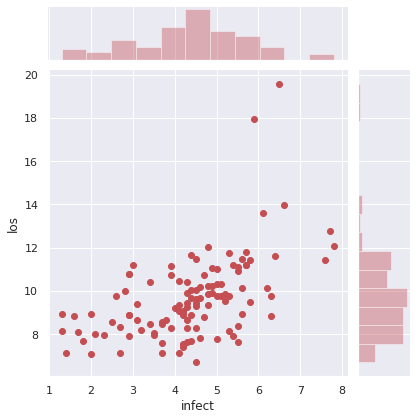

In [7]:
sns.jointplot(x="infect", y="los", data=df, color='r')

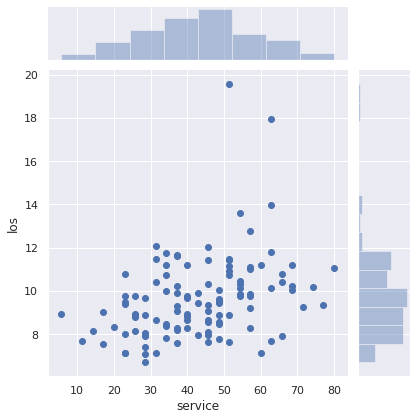

In [8]:
sns.jointplot(x="service", y="los", data=df, color='b')

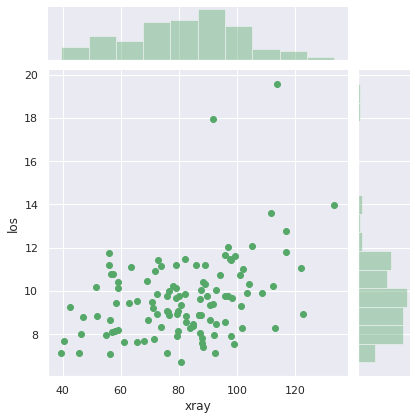

In [9]:
sns.jointplot(x="xray", y="los", data=df, color = 'g')

> All three predictor variables seem to have a **weak positive linear relationship with the outcome variable.**


---

c. Show a correlation matrix among the outcome and all three predictor variables. Which predictor variable has the highest correlation with the average length of stay? Are any of correlations significantly different from zero?


In [10]:
df[['los', 'infect', 'service', 'xray']].corr()

,los,infect,service,xray
los,1.000000,0.533444,0.355538,0.382482
infect,0.533444,1.000000,0.412601,0.453392
service,0.355538,0.412601,1.000000,0.111928
xray,0.382482,0.453392,0.111928,1.000000


In [11]:
stats.pearsonr(df['los'], df['infect'])

(0.5334438309449092, 1.1769611863413603e-09)

In [12]:
stats.pearsonr(df['los'], df['service'])

(0.3555379237673245, 0.00011133902905008859)

In [13]:
stats.pearsonr(df['los'], df['xray'])

(0.3824819298637572, 2.9055594558770278e-05)

> The highest correlation with the average length of stay is infection risk. All three predictor variables are significantly different from 0 (p < 0.05)

---

Regress average length of stay on each of the three predictor variables. Report the estimated regression equations. Give your interpretation on $\hat{β}_1$ for each of the equations.

In [14]:
sm.OLS(df['los'], df['infect']).fit().params

infect    2.090535
dtype: float64

In [15]:
sm.OLS(df['los'], df['service']).fit().params

service    0.20397
dtype: float64

In [16]:
sm.OLS(df['los'], df['xray']).fit().params

xray    0.113949
dtype: float64

The $\hat{β}_1$ for infection risk is **2.09**. The $\hat{β}_1$ for available facilities and services is **0.20397**. The $\hat{β}_1$ for routine chest x-rays is **0.113949**.

Overall, it seems like infection risk is the greatest predictor for length of hospital stay compared to available facilities and services and routine chest x-rays.



---

e. Plot the three estimated regression equations and data on separate scatter plots. Does a linear relation appear to provide a good fit for each of the three predictor variables? Are there any observations outside 95% prediction intervals?

                                 OLS Regression Results                                
Dep. Variable:                    los   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              1681.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                    2.76e-69
Time:                        09:23:10   Log-Likelihood:                         -261.95
No. Observations:                 113   AIC:                                      525.9
Df Residuals:                     112   BIC:                                      528.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

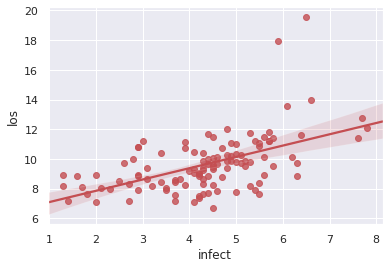

In [17]:
print(sm.OLS(df['los'], df['infect']).fit().summary())
sns.regplot(x="infect", y="los", data=df, color='r')

                                 OLS Regression Results                                
Dep. Variable:                    los   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              1006.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                    8.67e-58
Time:                        09:23:10   Log-Likelihood:                         -288.64
No. Observations:                 113   AIC:                                      579.3
Df Residuals:                     112   BIC:                                      582.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

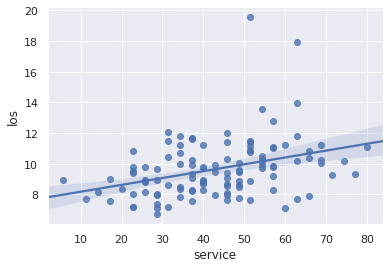

In [18]:
print(sm.OLS(df['los'], df['service']).fit().summary())
sns.regplot(x="service", y="los", data=df, color='b')

                                 OLS Regression Results                                
Dep. Variable:                    los   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              1905.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                    3.78e-72
Time:                        09:23:11   Log-Likelihood:                         -255.30
No. Observations:                 113   AIC:                                      512.6
Df Residuals:                     112   BIC:                                      515.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

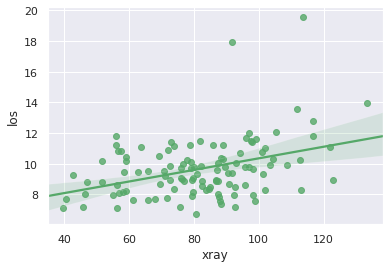

In [19]:
print(sm.OLS(df['los'], df['xray']).fit().summary())
sns.regplot(x="xray", y="los", data=df, color='g')

A linear relation appears to be a good fit for all predictors. Additionally, there are some points that lie outside the 95% confidence interval range for all models

---

Report MSE and R-square for each of the three predictor variables. Which predictor variable leads to the smallest variability around the fitted regression line? Using R2 as the criterion, which predictor variable accounts for the largest variability in length of stay?

In [0]:
# MSE: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html
# 'mse_resid',  the residual sum of squares divided by the number of degrees of freedom
# 'rsquared',
def mse_and_r_squared(x, y):
    mse = sm.OLS(df[y], df[x]).fit().mse_resid
    r2 = sm.OLS(df[y], df[x]).fit().rsquared
    return mse, r2

m1, r1 = mse_and_r_squared('infect', 'los')
m2, r2 = mse_and_r_squared('service', 'los')
m3, r3 = mse_and_r_squared('xray', 'los')

mlst = [m1, m2, m3]
rlst = [r1, r2, r3]

R2_df = pd.DataFrame(list(zip(mlst, rlst)), index =['Infection Risk', 'Facilities & Services', 'Chest X-ray Ratio'], columns = ['MSE', 'R2']) 

In [21]:
R2_df.T


,Infection Risk,Facilities & Services,Chest X-ray Ratio
MSE,6.093983,9.773292,5.417321
R2,0.937546,0.899838,0.944480


It seems like **Chest X-ray Ratio** has the smallest variability around the fitted regression line. According to the R-squared, the Chest X-ray Ratio model also has the largest variability in length of stay as explained by the variable chest x-ray ratio.



---
g. For each of the three fitted regression models, produce a residual plot against X and a normal probability plot of residuals. Summarize your conclusions. Is linear regression model more appropriate in one case than in the others?


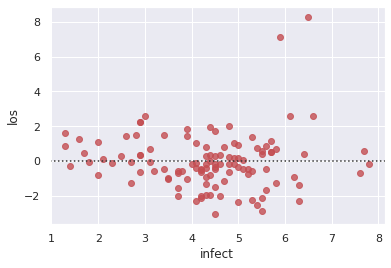

In [22]:
sns.residplot(x="infect", y="los", data=df, color='r')

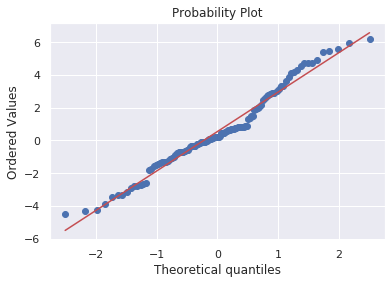

In [23]:
# color red
trash_tuple = stats.probplot(x=sm.OLS(df['los'], df['infect']).fit().resid, plot=sns.mpl.pyplot, fit=True)

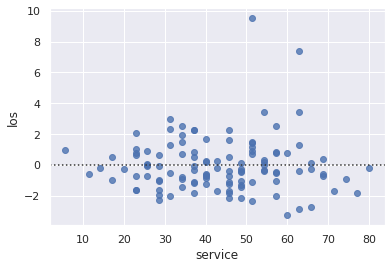

In [24]:
sns.residplot(x="service", y="los", data=df)

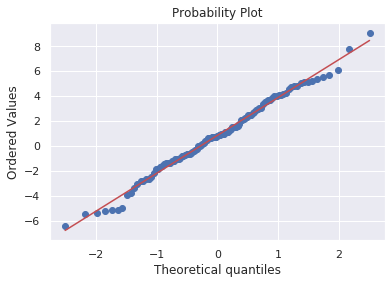

In [25]:
trash_tuple = stats.probplot(x=sm.OLS(df['los'], df['service']).fit().resid, plot=sns.mpl.pyplot, fit=True)

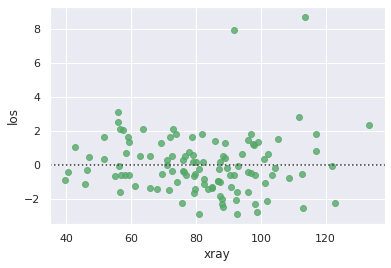

In [26]:
sns.residplot(x="xray", y="los", data=df, color = 'g')

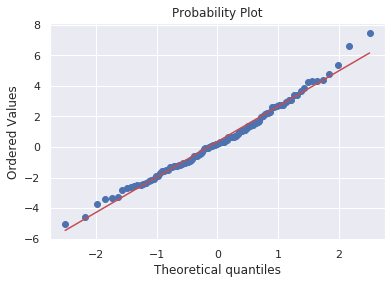

In [27]:
# color green
trash_tuple = stats.probplot(x=sm.OLS(df['los'], df['xray']).fit().resid, plot=sns.mpl.pyplot, fit=True)

It seems like the chest x-ray predictor variable is the most appropriate variable in this case because most of the points in the residual plot as well as the probability plot show properties that is expected from a normal distribution.


---


h. Regress average length of stay on each of the three predictor variables after excluding IDs 47 and 112. Report MSE and R-square for each of the three predictor variables again. How did MSE and R-square change after exclusion?

In [0]:
# Exclude two IDs

df = df[df['id'] != 47]
df = df[df['id'] != 112]

In [0]:
# Will overwrite previous table if code block is run again

m1, r1 = mse_and_r_squared('infect', 'los')
m2, r2 = mse_and_r_squared('service', 'los')
m3, r3 = mse_and_r_squared('xray', 'los')

mlst = [m1, m2, m3]
rlst = [r1, r2, r3]

R2_df = pd.DataFrame(list(zip(mlst, rlst)), index =['Infection Risk', 'Facilities & Services', 'Chest X-ray Ratio'], columns = ['MSE', 'R2']) 

In [30]:
R2_df.T

,Infection Risk,Facilities & Services,Chest X-ray Ratio
MSE,5.574201,8.940173,4.586472
R2,0.940027,0.903812,0.950654


MSE decreased for all models, and R2 increased all models.

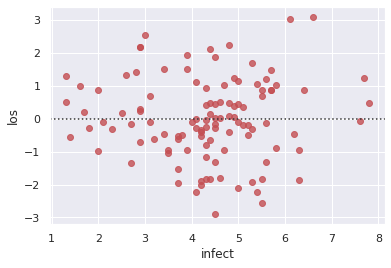

In [31]:
sns.residplot(x="infect", y="los", data=df, color='r')

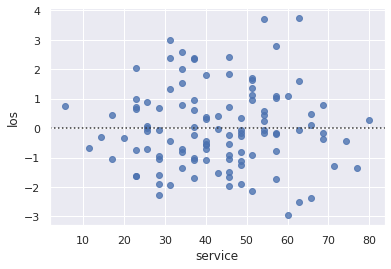

In [32]:
sns.residplot(x="service", y="los", data=df)

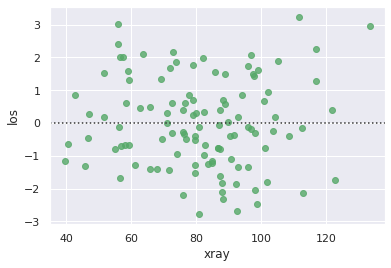

In [33]:
sns.residplot(x="xray", y="los", data=df, color='g')

The residuals look much better with the removal of outliers. Additionally, MSE decreased and R squared increased due to the removal of outliers as well. The removal of outliers serves to make our model stronger.

---
Refer to the SENIC data set. We are now interested in how the average length of stay in a hospital (Y) is related to infection risk (X) in each geographic region.

a. Produce a frequency table on geographic region and report relative frequencies of four geographical regions. Also produce boxplot by region. Are there any outliers? If any, try identifying IDs of those possible outliers and which regions they belong to.


In [34]:
# Frequency Table
df_clean[['id', 'region']].groupby('region').count()

,id
region,
1,28
2,32
3,37
4,16


In [35]:
# Relative Frequency 
(df_clean[['id', 'region']].groupby('region').count() / len(df_clean)) * 100

,id
region,
1,24.778761
2,28.318584
3,32.743363
4,14.159292


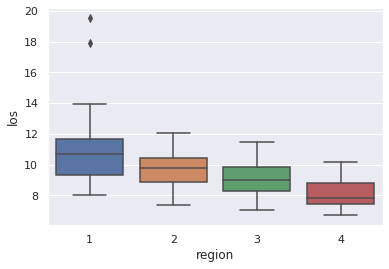

In [36]:
sns.boxplot(x="region", y="los", data=df_clean)

In [0]:
# Boxplot says outliers only lie in region 1 above the upper quantile so that's all I'll need

def return_upper_fence(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    return fence_high

In [38]:
fence_high = return_upper_fence(df_clean.loc[df_clean['region'] == 1], 'los')

df_clean.loc[df_clean['region'] == 1][df_clean['los']>fence_high].index.tolist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


[46, 111]

The possible outliers belong to Region 1, with IDs 46 and 111. Though we don't know if these are true outliers, we will keep them in the dataset for now.


---


b. Conduct region-stratified regression analysis, that is, regress average length of stay (Y) against infection risk (X) for each geographic region. Report the estimated regression equations. Are the estimated regression equations similar for the four regions? Describe your findings.

In [0]:
df1 = df_clean.loc[df_clean['region'] == 1]
df2 = df_clean.loc[df_clean['region'] == 2]
df3 = df_clean.loc[df_clean['region'] == 3]
df4 = df_clean.loc[df_clean['region'] == 4]

In [40]:
print(sm.OLS(df1['los'], df1['infect']).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    los   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              632.4
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                    2.85e-20
Time:                        09:23:15   Log-Likelihood:                         -63.121
No. Observations:                  28   AIC:                                      128.2
Df Residuals:                      27   BIC:                                      129.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
print(sm.OLS(df2['los'], df2['infect']).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    los   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              487.1
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                    1.61e-20
Time:                        09:23:15   Log-Likelihood:                         -73.233
No. Observations:                  32   AIC:                                      148.5
Df Residuals:                      31   BIC:                                      149.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
print(sm.OLS(df3['los'], df3['infect']).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    los   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              411.9
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                    2.69e-21
Time:                        09:23:15   Log-Likelihood:                         -88.253
No. Observations:                  37   AIC:                                      178.5
Df Residuals:                      36   BIC:                                      180.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
print(sm.OLS(df4['los'], df4['infect']).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                    los   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              290.4
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                    3.17e-11
Time:                        09:23:15   Log-Likelihood:                         -32.205
No. Observations:                  16   AIC:                                      66.41
Df Residuals:                      15   BIC:                                      67.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In the context of the regression model, the coefficients are similar for all three regions except the Western region. 


---

Obtain a separate interval estimate of $\hat{\beta}_1$ for each region using a 95% confidence level. Do the regression lines for the different regions appear to have similar slopes?

In [0]:
# NE, NC, South, West
# conf_int()
# params

dflst = [df1, df2, df3, df4]

dct = {}

j=0

for i in dflst:
    a = sm.OLS(i['los'], i['infect']).fit().conf_int()[0].values[0]
    b = sm.OLS(i['los'], i['infect']).fit().conf_int()[1].values[0]
    m = sm.OLS(i['los'], i['infect']).fit().params.values[0]
    

    j += 1

    dct[j] = (m, a, b)    

In [0]:
results = pd.DataFrame(dct).T


In [0]:
results.index = ['NE', 'NC', 'South', 'West']
results.columns = ['Slope', 'Low-CI', 'High-CI']

In [47]:
results

,Slope,Low-CI,High-CI
NE,2.223579,2.042156,2.405001
NC,2.061832,1.871304,2.252360
South,2.125584,1.913185,2.337984
West,1.785574,1.562237,2.008910


The regression lines appear to have similar slopes

In [0]:
mse_lst = []

for i in dflst:
    mse_lst.append(sm.OLS(i['los'], i['infect']).fit().mse_resid)

In [0]:
results['mse_lst'] = mse_lst

In [50]:
results

,Slope,Low-CI,High-CI,mse_lst
NE,2.223579,2.042156,2.405001,5.513061
NC,2.061832,1.871304,2.252360,5.876404
South,2.125584,1.913185,2.337984,7.098901
West,1.785574,1.562237,2.008910,3.498512


The variabilty around the fitted regression line is larger in the South and smaller in the West.



---
For each geographic region, produce a residual plot against X and a normal probability plot of residuals. Do the four regions appear to have similar error variances? What other conclusions do you draw from your plots?


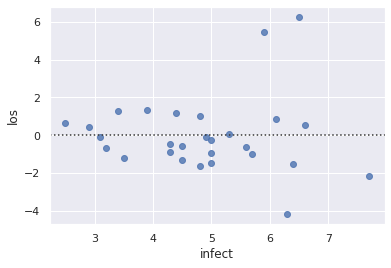

In [51]:
sns.residplot(x="infect", y="los", data=df1)

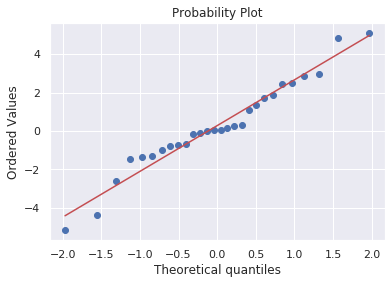

In [52]:
trash_tuple = stats.probplot(x=sm.OLS(df1['los'], df1['infect']).fit().resid, plot=sns.mpl.pyplot, fit=True)

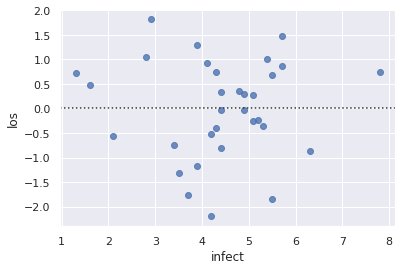

In [53]:
sns.residplot(x="infect", y="los", data=df2)

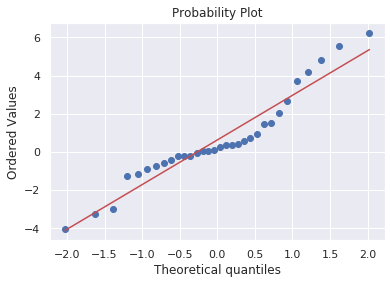

In [54]:
trash_tuple = stats.probplot(x=sm.OLS(df2['los'], df2['infect']).fit().resid, plot=sns.mpl.pyplot, fit=True)

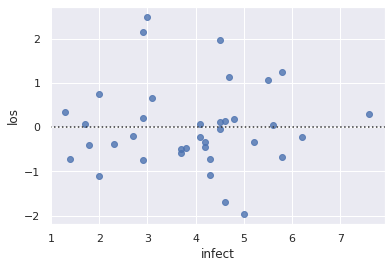

In [55]:
sns.residplot(x="infect", y="los", data=df3)

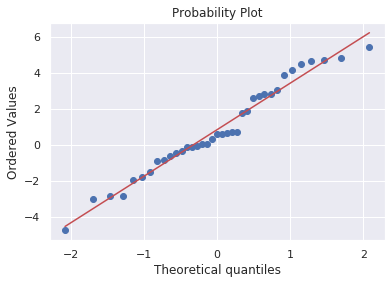

In [56]:
trash_tuple = stats.probplot(x=sm.OLS(df3['los'], df3['infect']).fit().resid, plot=sns.mpl.pyplot, fit=True)

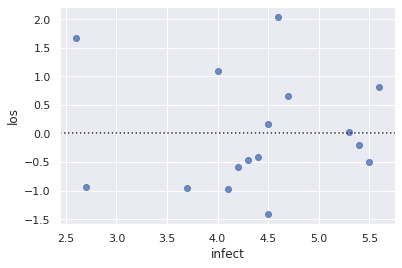

In [57]:
sns.residplot(x="infect", y="los", data=df4)

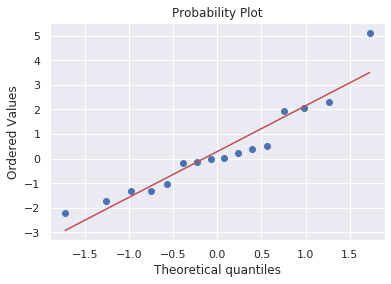

In [58]:
trash_tuple = stats.probplot(x=sm.OLS(df4['los'], df4['infect']).fit().resid, plot=sns.mpl.pyplot, fit=True)

No, the four regions do not appear as if they have similar error variances. I would conclude that individually the regions do not appear as if they appear normal. However, if we unstratify by region and collapse the data then the assumption of normality is more believable. If there is a strong suspicion that stratification by region is important, then I would set a random intercept by region for my model, based on what the boxplot looks like.